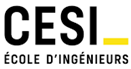
# <center><b><u>Livrable final, implémentation et exploitation, Algorithme Glouton :</u></b> </center>

### <u><b>Groupe :</b></u>
- BARRY Mamadou
- SADOWSKI Yann
- RAMBAUT Anthony
- VICINI Alexandre
- ALLIAS Gautier

FISA A3 INFO Pau

### <u><b>Données nécessaire au fonctionnement de l'algorithme :</b></u>
Les données que notre algorithme a besoin pour fonctionner peuvent provenir de 2 sources : 
- une génération automatique et aléatoire de points au sein d'un plan en deux dimensions 
- la lecture des données depuis un fichier .tsp qui suit le formalisme suivant : 

    NAME : filename<br>
    COMMENT : Rattled grid (Pulleyblank)<br>
    TYPE : TSP<br>
    DIMENSION : n<br>
    EDGE_WEIGHT_TYPE : EUC_2D<br>
    NODE_COORD_SECTION<br>
      1  6  4<br>
      2 15 15<br>
      n xn yn<br>
    EOF


### <u><b>Plan d'experience : </b></u>
1. Définir les objectifs de l'expérience :
    - Le plus petit temps d'éxécution
    - le poids le plus petit
    - une solution de bonne qualité -> une bonne répartition des villes entre les véhicules<br><br>

2. Choix des instances du problème : 
    - Une instance du rat99 et des instances pré-générées de 2 000, 4 000, 6 000 et 8 000 villes
        -> Utilisées pour les comparatifs
    - Une génération automatique de villes dans un plan en 2 dimensions 
        -> Utilisé pour montrer le fonctionnement de l'algorithme<br><br>
        
3. Approche : 
    - On va exécuter l'algorithme avec Rat99 en faisant évoluer le nombre de camions(2, 3, 5 et 7 camioms)
        -> Mesure du poids maximum, minimum et total
        -> Mesure du temps d'exécution
    - On va exécuter l'algorithme avec des instances de 2 000, 4 000, 6 000 et 8 000 villes
        -> Mesure de l'évolution du temps d'exécution en fonction du nombre de villes

Pour les étapes suivantes de notre plan d'experience : 

4. Conception de l'experience 
5. Mise en oeuvre et exécution de l'experience
6. Analyse
7. Interprétation 

Elles sont réparties dans la suite de ce notebook

### <u><b>Fonctionnement de l'algorithme :</b></u>
Voici l'algorithme de façon simplifié : <br>
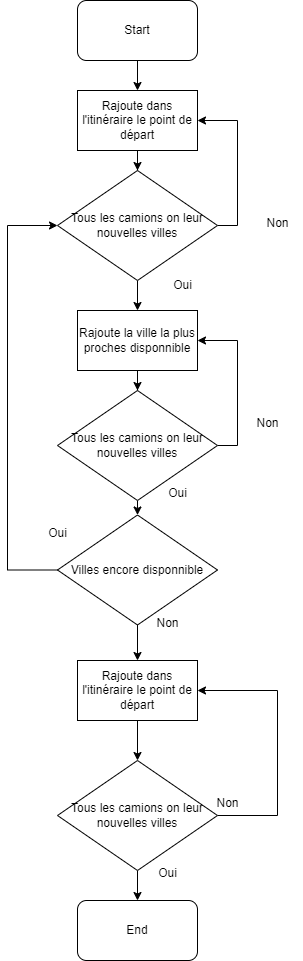

### <u><b>Implémentation de l'algorithme :</b></u>
Import des nos bibliothèques :

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools
import datetime


Nos fonctions :

In [3]:
#Functions that draw the graph
def draw_city_graph(coord_cities, solutions=None):

    # Draw highlighted edges for each road
    if solutions is not None:
        # Extended color palette
        colors = itertools.cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
                                  'tab:gray', 'tab:olive', 'tab:cyan'])

        for route in solutions:
            highlighted_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
            highlighted_edges = [tuple(edge) for edge in highlighted_edges]
            
            # Get the next color in the iterable
            color = next(colors)  
            
            for edge in highlighted_edges:
                x = [coord_cities[edge[0]][0], coord_cities[edge[1]][0]]
                y = [coord_cities[edge[0]][1], coord_cities[edge[1]][1]]
                plt.plot(x, y, color=color, linewidth=2)

    # Drawing nodes
    x = [coord[0] for coord in coord_cities.values()]
    y = [coord[1] for coord in coord_cities.values()]
    plt.scatter(x, y, s=10, c='k')

    plt.xlim(0, 100)  # X-axis values (x)
    plt.ylim(0, 100)  # Y-axis values (y)

    plt.axis('on')  # Show chart scale
    plt.show()

In [4]:
#Functions that draw the graph specific to rat99
def draw_city_graph_rat99(coord_cities, solutions=None):

    # Draw highlighted edges for each road
    if solutions is not None:
        # Extended color palette
        colors = itertools.cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
                                  'tab:gray', 'tab:olive', 'tab:cyan'])

        for route in solutions:
            highlighted_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
            highlighted_edges = [tuple(edge) for edge in highlighted_edges]
            
            # Get the next color in the iterable
            color = next(colors)  
            
            for edge in highlighted_edges:
                x = [coord_cities[edge[0]][0], coord_cities[edge[1]][0]]
                y = [coord_cities[edge[0]][1], coord_cities[edge[1]][1]]
                plt.plot(x, y, color=color, linewidth=2)

    # Drawing nodes
    x = [coord[0] for coord in coord_cities.values()]
    y = [coord[1] for coord in coord_cities.values()]
    plt.scatter(x, y, s=10, c='k')

    plt.xlim(0, 90)  # X-axis values (x)
    plt.ylim(0, 250)  # Y-axis values (y)

    plt.axis('on')  # Show chart scale
    plt.show()

In [5]:
def calculate_distance(coord1, coord2):
    
    # Calculation of the Euclidean distance between two coordinates
    x1, y1 = coord1
    x2, y2 = coord2
    
    distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    
    return int(distance)


In [6]:
# function that generate random cities
def generate_city_distances_rdm(num_cities):
    
    # Generation of city names as letters
    cities = [chr(ord('A')+i ) for i in range(num_cities-1)]
    
    # Generation of random coordinates for each city
    city_coordinates = {}

    for city in cities:
        if city == "A" :
            x = 50
            y = 50
            city_coordinates["A"] = (x, y)
        else :
            x = random.randint(0,100)
            y = random.randint(0,100)
            city_coordinates[city] = (x, y)
    
    
    # Calculation of distances between cities
    city_distances = {}
    for city1 in cities:
        city_distances[city1] = {}
        
        for city2 in cities:
            if city1 == city2:
                # Null distance for the same city (ignored in the graph)
                distance = float('inf')  
                
            else:
                distance = calculate_distance(city_coordinates[city1], city_coordinates[city2])
                    
            city_distances[city1][city2] = distance
    
    
    return city_distances, city_coordinates


In [7]:
# Same as before but need a .tsp file instead
def generate_city_distances_file(file_path):
    
    city_coordinates = {}

    with open(file_path, 'r') as file:
        lines = file.readlines()

    start_index = lines.index("NODE_COORD_SECTION\n") + 1
    end_index = lines.index("EOF\n")

    for line in lines[start_index:end_index]:
        parts = line.split()
        node = str(parts[0])
        x = int(parts[1])
        y = int(parts[2])
        city_coordinates[node] = (x, y)
        
    cities = list(city_coordinates.keys())
    
    # Calculation of distances between cities
    city_distances = {}
    for city1 in cities:
        city_distances[city1] = {}
        
        for city2 in cities:
            if city1 == city2:
                # Null distance for the same city (ignored in the graph)
                distance = float('inf')  
                
            else:
                distance = calculate_distance(city_coordinates[city1], city_coordinates[city2])
                    
            city_distances[city1][city2] = distance
    
    return city_distances, city_coordinates



In [8]:
def glouton(city_distances,  nbrCamions):
    
        cities = list(city_distances.keys())
        
        # Initialize the truck to the starting city
        individual = [[cities[0]] for _ in range(nbrCamions)]
        
        # Crée une copie des villes à visiter
        cities_copy = cities[1:]  

        # Assign cities to each truck until there are none left
        while cities_copy:
            for i in range(nbrCamions):
                if cities_copy:  # s'il reste des villes à assigner
                    current_city = individual[i][-1]
                    
                    nearest_city = min(cities_copy, key=lambda city: city_distances[current_city][city])
                    
                    individual[i].append(nearest_city)
                    cities_copy.remove(nearest_city)

        # Add the departure city at the end of each route
        for i in range(nbrCamions):
            individual[i].append(cities[0])

        return individual


### <u><b>Execution de l'algorithme avec une instance aléatoire  :</b></u>


End solution :
Execution Time : 1.532766
Numbers of trucks :  50
Numbers of cities :  5000
  Max weights: 373
  Min weights: 160
  Sum weights: 12665
  Difference max-min: 213


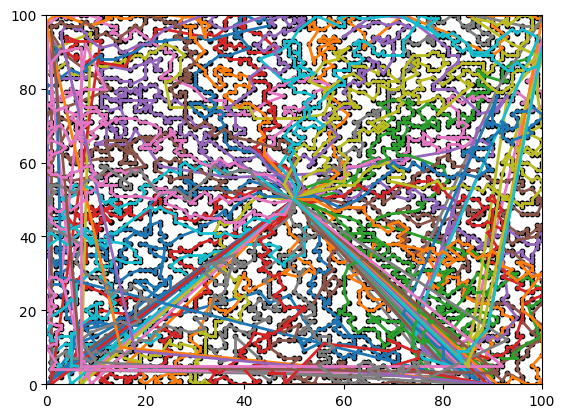

In [9]:
#########################
# Testing the Algorithm #
#########################

#  Model Parameters
nbrCamions = 50
# must be greater than 2*nbrTrucks+1
num_cities = 5000


city_distances, coord_cities = generate_city_distances_rdm(num_cities)

max_weights = []
min_weights = []
sum_weights = []

date_start = datetime.datetime.now()
best_solution = glouton(city_distances, nbrCamions)
date_stop = datetime.datetime.now()
delta = (date_stop-date_start).total_seconds()

total_weights = []

for route in best_solution:
    total_weight = 0
    for i in range(len(route) - 1):
        city1 = route[i]
        city2 = route[i + 1]
        total_weight += city_distances[city1][city2]
        
    total_weights.append(total_weight)

max_weights.append(max(total_weights))
min_weights.append(min(total_weights))
sum_weights.append(sum(total_weights))

print("End solution :")
print ("Execution Time :", delta)
print ("Numbers of trucks : ", nbrCamions)
print ("Numbers of cities : ", num_cities)
print("  Max weights:", max(total_weights))
print("  Min weights:", min(total_weights))
print("  Sum weights:", sum(total_weights))
print("  Difference max-min:", max(total_weights) - min(total_weights))

draw_city_graph(coord_cities, best_solution)


plt.show()

<u><b>Execution :</b></u><br>
Exemple d'exécution avec rat99 et 4 camions : <a name="exempleRat99"></a>

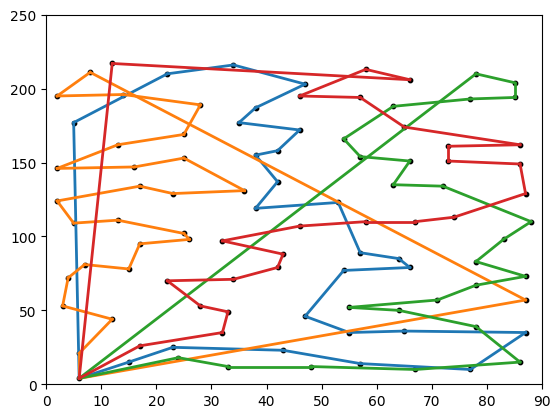

In [10]:
#########################
# Testing the Algorithm #
#########################

#  Model Parameters
nbrCamions = 4

# must be greater than 2*nbrTrucks+1
filename ="rat99.tsp"

city_distances, coord_cities = generate_city_distances_file(filename)

best_solution = glouton(city_distances, nbrCamions)

draw_city_graph_rat99(coord_cities, best_solution)

plt.show()

### <u><b>Execution de l'algorithme avec des instances prédéfinies et analyse des performances :</b></u>

##### <u><b>Rat99 avec 2, 3, 5 et 7 camions :</b></u>

Execution :

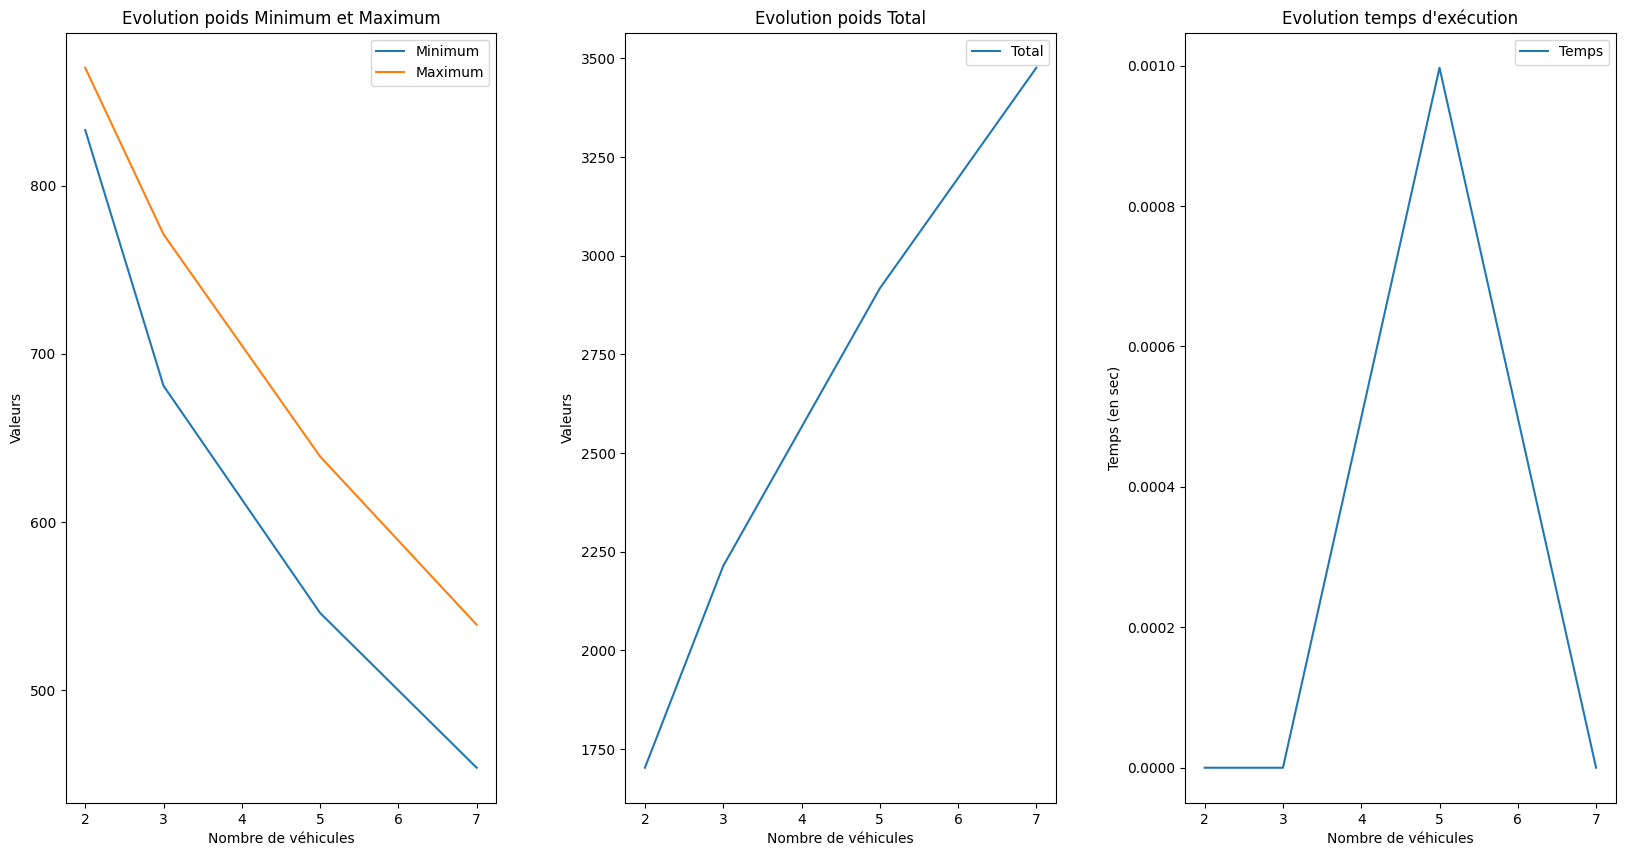

In [15]:
#########################
# Testing the Algorithm #
#########################

#  Model Parameters
nbrCamionslist = [2,3,5,7]

# must be greater than 2*nbrTrucks+1
filename = "rat99.tsp"

exec_time = []
max_weights = []
min_weights = []
sum_weights = []

city_distances, coord_cities = generate_city_distances_file(filename)

for nbrCamions in nbrCamionslist:

    date_start = datetime.datetime.now()
    best_solution = glouton(city_distances, nbrCamions)
    date_stop = datetime.datetime.now()
    delta = (date_stop-date_start).total_seconds()
    exec_time.append(delta)
    
    total_weights = []
    
    for route in best_solution:
        total_weight = 0
        for i in range(len(route) - 1):
            city1 = route[i]
            city2 = route[i + 1]
            total_weight += city_distances[city1][city2]
            
        total_weights.append(total_weight)

    max_weights.append(max(total_weights))
    min_weights.append(min(total_weights))
    sum_weights.append(sum(total_weights))
    
# Creation of minimum and maximum weight evolution graph
plt.subplot(1, 3, 1)
plt.plot(nbrCamionslist, min_weights, label='Minimum')
plt.plot(nbrCamionslist, max_weights, label='Maximum')

plt.xlabel('Nombre de véhicules')
plt.ylabel('Valeurs')
plt.title('Evolution poids Minimum et Maximum')
plt.legend()

# Creation of total weight evolution graph
plt.subplot(1, 3, 2)
plt.plot(nbrCamionslist, sum_weights, label='Total')

plt.xlabel('Nombre de véhicules')
plt.ylabel('Valeurs')
plt.title('Evolution poids Total')
plt.legend()

# Creation of execution time evolution graph
plt.subplot(1, 3, 3)
plt.plot(nbrCamionslist, exec_time, label='Temps')

plt.xlabel('Nombre de véhicules')
plt.ylabel('Temps (en sec)')
plt.title('Evolution temps d\'exécution')
plt.legend()

#Figsize
plt.subplots_adjust(wspace=0.3)


plt.show()                   

Voici les résultat des performances de l'algorithme pour une instance bien définie (rat99), c'est résultats feront objet d'une critique dans la partie [Bilan](#bilan)

##### <u><b>Algorithme avec 2 000, 4 000, 6 000 et 8 000 camions, et un depot centré :</b></u>

MTSP solved


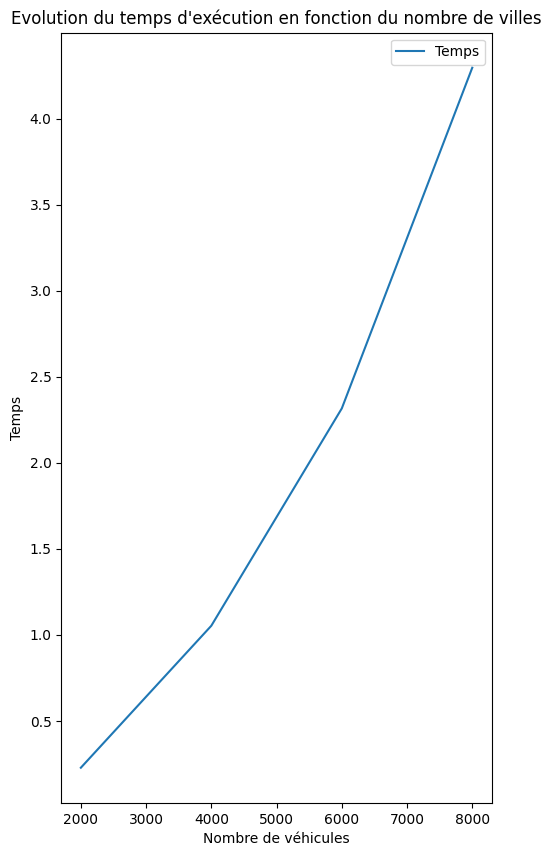

In [16]:
#########################
# Testing the Algorithm #
#########################

#  Model Parameters
nbrCamions = 10

# must be greater than 2*nbrTrucks+1
filenameList = ((2000,"instance/instance2k"), (4000,"instance/instance4k"), (6000,"instance/instance6k"), (8000,"instance/instance8k"))

exec_time = []
instances = []

for filename in filenameList:
    city_distances, coord_cities = generate_city_distances_file(filename[1])
    
    date_start = datetime.datetime.now()
    best_solution = glouton(city_distances, nbrCamions)
    date_stop = datetime.datetime.now()
    delta = (date_stop-date_start).total_seconds()
    exec_time.append(delta)
    
    instances.append(filename[0])

print("MTSP solved")
    
# Creation of minimum and maximum weight evolution graph
plt.subplot(1, 3, 1)
plt.plot(instances, exec_time, label='Temps')

plt.xlabel('Nombre de véhicules')
plt.ylabel('Temps')
plt.title('Evolution du temps d\'exécution en fonction du nombre de villes')
plt.legend()

#Figsize
plt.subplots_adjust(wspace=0.3)

plt.show()             

Voici les résultat des performances de l'algorithme pour un jeu de grandes instances (2000, 4000, 6000 et 8000), c'est résultats feront objet d'une critique dans la partie [Bilan](#bilan)

### <u><b>Bilan et critique : </b></u>


On voit qu'avec l'algorithme du glouton, il va créer des itinéraires qui s'allongent. Cela va causer d'avoir un trajet de fin long.
Qui plus est, cet algorithme fait des imperfections plutôt visibles sur petite instance dû au fait qu'il cherche la plus proche ville disponible et non le meilleur chemin.

<u>Idée d'amélioration :</u><br>
Pour améliorer le trajet de fin. On pourrait chercher à modifier le fonctionnement de l'algorithme. Cela en faisant en sorte qu'il essaye à partir d'un certain nombre de villes au autre, qu'il cherche la ville la plus proche disponible pour revenir à la ville de départ.

Pour les imperfections, on pourrait essayer de faire une liste de mémoires par exemple de taille 3. Ou l'algorithme essaye de faire la route de 3 villes les plus proches le plus petit possible.